# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Step #1
### Read files using `pandas`

In [4]:
df = pd.read_excel('PredictorData.xls')
df

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
0,187101,4.44,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.004955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,4.50,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.004514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,4.61,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.004243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,4.74,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.004632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,4.86,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.003691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,200508,1220.33,21.292000,65.50,0.335731,0.0344,0.0509,0.0596,0.0432,0.004658,0.002867,0.005118,0.0333,0.0233,0.000697,NaN,-0.0092,-0.0113
1616,200509,1228.81,21.475000,66.57,0.332964,0.0342,0.0513,0.0603,0.0464,0.006060,0.002850,0.012220,-0.0338,-0.0310,0.000660,NaN,0.0080,0.0068
1617,200510,1207.01,21.723333,67.69,0.337067,0.0371,0.0535,0.0630,0.0484,0.005057,0.003092,0.002012,-0.0196,-0.0204,0.001818,NaN,-0.0156,-0.0166
1618,200511,1249.48,21.971667,68.81,0.325656,0.0388,0.0542,0.0639,0.0481,0.006151,0.003233,-0.008032,0.0076,0.0099,0.000540,NaN,0.0384,0.0358


# Step #2
### Variables to create:


1. Default Yield Spread
2. Inflation                  (there) (done)
3. Stock Variance             (there) (done)
4. Dividend Payout ratio              (done)
5. Long Term Yield            (there) (done)
6. Term Spread                       (can be calculated) (done)
7. Treasury-bill rate         (there) (done)
8. Default Return Spread             (can be calculated) (done)
9. Dividend Price Ratio              (can be calculated) (done)
10. Dividend Yield                   (can be calculated) (done)
11. Long Term Return.         (there) 
12. Earning price ratio              (can be calculated) (done)
13. Book to market            (there) 
14. Net Equity Expansion.     (there)



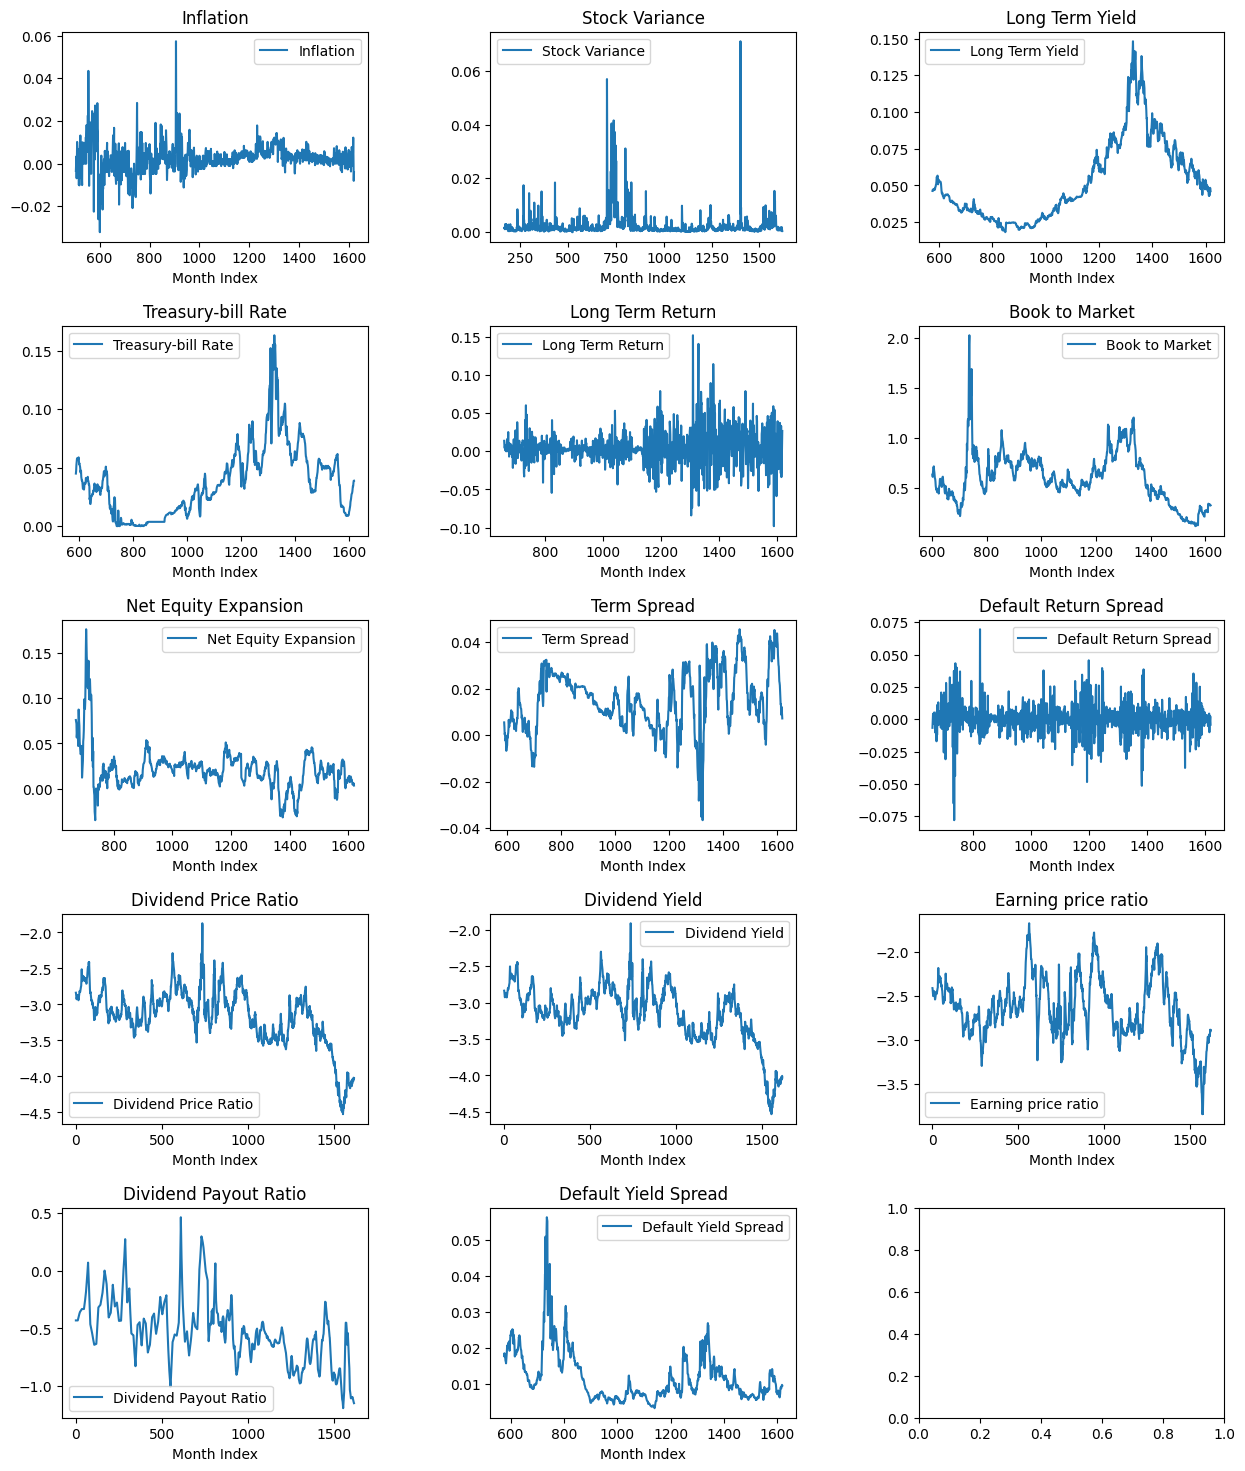

In [5]:
## Available variable in the dataframe:
date = np.array(df[['yyyymm']])
inflation = np.array(df[['infl']])       # inflation
stock_var = np.array(df[['svar']])       # stock variance
long_term_yield = np.array(df[['lty']])  # long term yield
tresuury = np.array(df[['tbl']])         # Treasury-bill rate
long_term_return = np.array(df[['ltr']]) # long term return
book_to_market = np.array(df[['b/m']])   # book to market
ntis = np.array(df[['ntis']])            # net equity expansion


## Variables to calculate:
term_spread = np.array(df['lty'] - df['tbl'])                  # Term Spread
drs = np.array(df['corpr'] - df['ltr'])                        # default return spread
dpr = np.array(np.log(df['D12']) - np.log(df['Index']))        # Dividend Price Ratio
dy = np.array(np.log(df['D12'])- np.log(df['Index'].shift(1))) # Dividend Yield
epr = np.array(np.log(df['E12']) - np.log(df['Index']))        # Earning price ratio
dpor = np.array(np.log(df['D12']) - np.log(df['E12']))         # Dividend payout ratio
dys = np.array(df['BAA'] - df['AAA'])                          # default yield spread
Equity_premium = df['CRSP_SPvw'] - df['Rfree']                 # Equity premium

# Plot
titles = ['Inflation','Stock Variance','Long Term Yield','Treasury-bill Rate','Long Term Return',
          'Book to Market','Net Equity Expansion','Term Spread','Default Return Spread',
          'Dividend Price Ratio','Dividend Yield','Earning price ratio','Dividend Payout Ratio','Default Yield Spread']

data_to_plot = [inflation, stock_var, long_term_yield, tresuury, long_term_return, book_to_market,
                ntis, term_spread, drs, dpr, dy, epr, dpor, dys]

fig, axes = plt.subplots(5, 3, figsize=(15, 18)) # Create a 3x5 grid of subplots
axes_flat = axes.flatten() # Flatten the axes array to easily iterate over it

# Iterate over the axes and create 14 subplots
for i in range(len(axes.flat)-1):
    axes.flat[i].plot(data_to_plot[i], label=titles[i])
    axes.flat[i].set_title(titles[i])
    axes.flat[i].set_xlabel('Month Index')
    axes.flat[i].legend()

# Add some padding between the subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the figure
plt.show()


# Step #3
### Detailed Steps:
1. Read the updated dataset.
2. Preprocess the dataframe.
2. Get dataframe for the all 14 varliables.
3. Check data and do any required preprocessing.

#### Read Data

In [6]:
df = pd.read_csv('PredictorData2021.xlsx - Monthly.csv')
df['Index'] = pd.to_numeric(df['Index'].str.replace(',', ''))
df

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
0,187101,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,202108,4522.68,58.7913,169.8333,0.184756,0.0005,0.0255,0.0324,0.0128,0.014846,0.000000,0.002066,-0.0035,-0.0045,0.000602,NaN,0.030600,0.029205
1808,202109,4307.54,59.2545,175.3700,0.193036,0.0004,0.0253,0.0323,0.0137,0.015598,0.000000,0.002716,-0.0250,-0.0194,0.001393,NaN,-0.046076,-0.047152
1809,202110,4605.38,59.6354,182.8600,0.182389,0.0005,0.0268,0.0335,0.0158,0.013368,0.000000,0.008308,0.0051,0.0159,0.001151,NaN,0.070510,0.069627
1810,202111,4567.00,60.0162,190.3500,0.189455,0.0005,0.0262,0.0328,0.0156,0.015640,0.000100,0.004913,0.0210,0.0094,0.001327,NaN,-0.007256,-0.008665


#### Process Data

In [7]:
## Available variable in the dataframe:
date = np.array(df[['yyyymm']])
inflation = np.array(df[['infl']])       # inflation
stock_var = np.array(df[['svar']])       # stock variance
long_term_yield = np.array(df[['lty']])  # long term yield
tresury = np.array(df[['tbl']])          # Treasury-bill rate
long_term_return = np.array(df[['ltr']]) # long term return
book_to_market = np.array(df[['b/m']])   # book to market
ntis = np.array(df[['ntis']])            # net equity expansion


## Variables to calculate:
term_spread = np.array(df['lty'] - df['tbl'])                  # Term Spread
drs = np.array(df['corpr'] - df['ltr'])                        # default return spread
dpr = np.array(np.log(df['D12']) - np.log(df['Index']))        # Dividend Price Ratio
dy = np.array(np.log(df['D12'])- np.log(df['Index'].shift(1))) # Dividend Yield
epr = np.array(np.log(df['E12']) - np.log(df['Index']))        # Earning price ratio
dpor = np.array(np.log(df['D12']) - np.log(df['E12']))         # Dividend payout ratio
dys = np.array(df['BAA'] - df['AAA'])                          # default yield spread
Equity_premium = df['CRSP_SPvw'] - df['Rfree']                 # Equity premium

# Get dataframe for all variables
combined_variables = np.column_stack((date, inflation, stock_var, long_term_yield, tresury, long_term_return, book_to_market, ntis,
                                      term_spread, drs, dpr, dy, epr, dpor, dys, Equity_premium)) # combine variables

df_new = pd.DataFrame(combined_variables, columns = ['date'] + titles + ['Equity_premium']) # get dataframe
df_new['date'] = pd.to_datetime(df_new['date'], format='%Y%m')
split_date = pd.Timestamp('2008-12-01')
df_new = df_new[df_new['date'] <= split_date]

#### Perform Regression
1. Split data into training (in-sample) and testing (out-of-sample) sets..
2. Remove rows that include `NaN`
3. Define independent variables and prepare features and labels.
2. Perfom linear regression for the required dates.

#### 1965 to December 2008

In [8]:
## Provided date for splitting:
split_date = pd.Timestamp('1965-12-01')

## Split the DataFrame based on the provided date:
# Testing & testing
test_df = df_new[df_new['date'] > split_date]
test_df = test_df.dropna()

## Define independent and dependent variables:
independent_variables = df_new.columns[1:-2]
dependent_variables = df_new.columns[-1]

# training (in-sample)
# X_train = train_df[independent_variables][1:]
# y_train = train_df[dependent_variables].shift(1)[1:]
X_train = test_df[independent_variables][1:]
y_train = test_df[dependent_variables][1:]

# testing (out-of-sample)
X_test = test_df[independent_variables][1:]
y_test = test_df[dependent_variables].shift(1)[1:]

# Train the multivariate linear regression model
model = sm.OLS(y_train, X_train).fit()

# Evaluate the model's performance
predictions = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse_model = ((y_test - predictions) ** 2).mean() # MSE
historical_avg_premium = y_train.mean() # historical average
benchmark_predictions = np.full_like(y_test, historical_avg_premium) # benchmark predictions
mse_benchmark = np.mean((y_test - benchmark_predictions) ** 2) # MSE of the benchmark
T = len(y_test) # number of samlpes
K = len(independent_variables) # number of features
mse_a = (T / (T - K - 1)) * mse_model # MSE_A
mse_n = mse_model / mse_benchmark # MSE_n
R2 = 1-(mse_a/mse_n) # R2
print("R2:", R2)
print("RMSE (%): ", np.sqrt(mse_model)*100)
MAE = np.mean(np.abs(y_test - predictions))
print('MAE (%): ', MAE*100)

R2: 0.9980174412394691
RMSE (%):  6.083803922406943
MAE (%):  4.713356860342294


#### 1976 to December 2008

In [9]:
## Provided date for splitting:
split_date = pd.Timestamp('1976-12-01')

## Split the DataFrame based on the provided date:
# Testing & testing
test_df = df_new[df_new['date'] > split_date]
test_df = test_df.dropna()

## Define independent and dependent variables:
independent_variables = df_new.columns[1:-2]
dependent_variables = df_new.columns[-1]

# training (in-sample)
X_train = test_df[independent_variables][1:]
y_train = test_df[dependent_variables][1:]

# testing (out-of-sample)
X_test = test_df[independent_variables][1:]
y_test = test_df[dependent_variables].shift(1)[1:]

# Train the multivariate linear regression model
model = sm.OLS(y_train, X_train).fit()

# Evaluate the model's performance
predictions = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse_model = ((y_test - predictions) ** 2).mean() # MSE
historical_avg_premium = y_train.mean() # historical average
benchmark_predictions = np.full_like(y_test, historical_avg_premium) # benchmark predictions
mse_benchmark = np.mean((y_test - benchmark_predictions) ** 2) # MSE of the benchmark
T = len(y_test) # number of samlpes
K = len(independent_variables) # number of features
mse_a = (T / (T - K - 1)) * mse_model # MSE_A
mse_n = mse_model / mse_benchmark # MSE_n
R2 = 1-(mse_a/mse_n) # R2
print("R2:", R2)
print("RMSE (%): ", np.sqrt(mse_model)*100)
MAE = np.mean(np.abs(y_test - predictions))
print('MAE (%): ', MAE*100)

R2: 0.9980305171058477
RMSE (%):  6.0130212049381955
MAE (%):  4.6938581846434255


#### 2000 to December 2008

In [10]:
## Provided date for splitting:
split_date = pd.Timestamp('2000-12-01')

## Split the DataFrame based on the provided date:
# Testing & testing
test_df = df_new[df_new['date'] > split_date]
test_df = test_df.dropna()

## Define independent and dependent variables:
independent_variables = df_new.columns[1:-2]
dependent_variables = df_new.columns[-1]

# training (in-sample)
X_train = test_df[independent_variables][1:]
y_train = test_df[dependent_variables][1:]

# testing (out-of-sample)
X_test = test_df[independent_variables][1:]
y_test = test_df[dependent_variables].shift(1)[1:]

# Train the multivariate linear regression model
model = sm.OLS(y_train, X_train).fit()

# Evaluate the model's performance
predictions = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse_model = ((y_test - predictions) ** 2).mean() # MSE
historical_avg_premium = y_train.mean() # historical average
benchmark_predictions = np.full_like(y_test, historical_avg_premium) # benchmark predictions
mse_benchmark = np.mean((y_test - benchmark_predictions) ** 2) # MSE of the benchmark
T = len(y_test) # number of samlpes
K = len(independent_variables) # number of features
mse_a = (T / (T - K - 1)) * mse_model # MSE_A
mse_n = mse_model / mse_benchmark # MSE_n
R2 = 1-(mse_a/mse_n) # R2
print("R2:", R2)
print("RMSE (%): ", np.sqrt(mse_model)*100)
MAE = np.mean(np.abs(y_test - predictions))
print('MAE (%): ', MAE*100)

R2: 0.9978105048638475
RMSE (%):  5.437846476178042
MAE (%):  4.148752070240555


# Step #4
### Detailed Steps:
1. I would choose to SVR and Boosting.
2. Perform regression.
3. Calculate required error metrics.

### SVR

#### 1965 to December 2008



In [11]:
## Provided date for splitting:
split_date = pd.Timestamp('1965-12-01')

## Split the DataFrame based on the provided date:
# Testing & testing
test_df = df_new[df_new['date'] > split_date]
test_df = test_df.dropna()

## Define independent and dependent variables:
independent_variables = df_new.columns[1:-2]
dependent_variables = df_new.columns[-1]

# training (in-sample)
# X_train = train_df[independent_variables][1:]
# y_train = train_df[dependent_variables].shift(1)[1:]
X_train = test_df[independent_variables][1:]
y_train = test_df[dependent_variables][1:]

# testing (out-of-sample)
X_test = test_df[independent_variables][1:]
y_test = test_df[dependent_variables].shift(1)[1:]

# Train the multivariate linear regression model
svr = SVR(kernel='rbf', C=1, epsilon=0.1, gamma='scale')
svr.fit(X_train, y_train)

# Evaluate the model's performance
predictions = svr.predict(X_test)

# Calculate the mean squared error (MSE)
mse_model = ((y_test - predictions) ** 2).mean() # MSE
historical_avg_premium = y_train.mean() # historical average
benchmark_predictions = np.full_like(y_test, historical_avg_premium) # benchmark predictions
mse_benchmark = np.mean((y_test - benchmark_predictions) ** 2) # MSE of the benchmark
T = len(y_test) # number of samlpes
K = len(independent_variables) # number of features
mse_a = (T / (T - K - 1)) * mse_model # MSE_A
mse_n = mse_model / mse_benchmark # MSE_n
R2 = 1-(mse_a/mse_n) # R2
print("R2:", R2)
print("RMSE (%): ", np.sqrt(mse_model)*100)
MAE = np.mean(np.abs(y_test - predictions))
print('MAE (%): ', MAE*100)

R2: 0.9980174412394691
RMSE (%):  4.511057717731942
MAE (%):  3.483568702418638


#### 1976 to December 2008

In [12]:
## Provided date for splitting:
split_date = pd.Timestamp('1976-12-01')


## Split the DataFrame based on the provided date:
# Testing & testing
test_df = df_new[df_new['date'] > split_date]
test_df = test_df.dropna()

## Define independent and dependent variables:
independent_variables = df_new.columns[1:-2]
dependent_variables = df_new.columns[-1]

# training (in-sample)
# X_train = train_df[independent_variables][1:]
# y_train = train_df[dependent_variables].shift(1)[1:]
X_train = test_df[independent_variables][1:]
y_train = test_df[dependent_variables][1:]

# testing (out-of-sample)
X_test = test_df[independent_variables][1:]
y_test = test_df[dependent_variables].shift(1)[1:]

# Train the multivariate linear regression model
svr = SVR(kernel='rbf', C=1, epsilon=0.1, gamma='scale')
svr.fit(X_train, y_train)

# Evaluate the model's performance
predictions = svr.predict(X_test)

# Calculate the mean squared error (MSE)
mse_model = ((y_test - predictions) ** 2).mean() # MSE
historical_avg_premium = y_train.mean() # historical average
benchmark_predictions = np.full_like(y_test, historical_avg_premium) # benchmark predictions
mse_benchmark = np.mean((y_test - benchmark_predictions) ** 2) # MSE of the benchmark
T = len(y_test) # number of samlpes
K = len(independent_variables) # number of features
mse_a = (T / (T - K - 1)) * mse_model # MSE_A
mse_n = mse_model / mse_benchmark # MSE_n
R2 = 1-(mse_a/mse_n) # R2
print("R2:", R2)
print("RMSE (%): ", np.sqrt(mse_model)*100)
MAE = np.mean(np.abs(y_test - predictions))
print('MAE (%): ', MAE*100)

R2: 0.9980305171058477
RMSE (%):  4.548481009310539
MAE (%):  3.5280854258182734


#### 2000 to December 2008

In [13]:
## Provided date for splitting:
split_date = pd.Timestamp('2000-12-01')


## Split the DataFrame based on the provided date:
# Testing & testing
test_df = df_new[df_new['date'] > split_date]
test_df = test_df.dropna()

## Define independent and dependent variables:
independent_variables = df_new.columns[1:-2]
dependent_variables = df_new.columns[-1]

# training (in-sample)
# X_train = train_df[independent_variables][1:]
# y_train = train_df[dependent_variables].shift(1)[1:]
X_train = test_df[independent_variables][1:]
y_train = test_df[dependent_variables][1:]

# testing (out-of-sample)
X_test = test_df[independent_variables][1:]
y_test = test_df[dependent_variables].shift(1)[1:]

# Train the multivariate linear regression model
svr = SVR(kernel='rbf', C=1, epsilon=0.1, gamma='scale')
svr.fit(X_train, y_train)

# Evaluate the model's performance
predictions = svr.predict(X_test)

# Calculate the mean squared error (MSE)
mse_model = ((y_test - predictions) ** 2).mean() # MSE
historical_avg_premium = y_train.mean() # historical average
benchmark_predictions = np.full_like(y_test, historical_avg_premium) # benchmark predictions
mse_benchmark = np.mean((y_test - benchmark_predictions) ** 2) # MSE of the benchmark
T = len(y_test) # number of samlpes
K = len(independent_variables) # number of features
mse_a = (T / (T - K - 1)) * mse_model # MSE_A
mse_n = mse_model / mse_benchmark # MSE_n
R2 = 1-(mse_a/mse_n) # R2
print("R2:", R2)
print("RMSE (%): ", np.sqrt(mse_model)*100)
MAE = np.mean(np.abs(y_test - predictions))
print('MAE (%): ', MAE*100)

R2: 0.9978105048638475
RMSE (%):  4.094725471332438
MAE (%):  3.2429181176424646


### Boosting

#### 1965 to December 2008

In [14]:
## Provided date for splitting:
split_date = pd.Timestamp('1965-12-01')

## Split the DataFrame based on the provided date:
# Testing & testing
test_df = df_new[df_new['date'] > split_date]
test_df = test_df.dropna()

## Define independent and dependent variables:
independent_variables = df_new.columns[1:-2]
dependent_variables = df_new.columns[-1]

# training (in-sample)
# X_train = train_df[independent_variables][1:]
# y_train = train_df[dependent_variables].shift(1)[1:]
X_train = test_df[independent_variables][1:]
y_train = test_df[dependent_variables][1:]

# testing (out-of-sample)
X_test = test_df[independent_variables][1:]
y_test = test_df[dependent_variables].shift(1)[1:]

# Train the multivariate linear regression model
gbr = GradientBoostingRegressor(n_estimators=8, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Evaluate the model's performance
predictions = gbr.predict(X_test)

# Calculate the mean squared error (MSE)
mse_model = ((y_test - predictions) ** 2).mean() # MSE
historical_avg_premium = y_train.mean() # historical average
benchmark_predictions = np.full_like(y_test, historical_avg_premium) # benchmark predictions
mse_benchmark = np.mean((y_test - benchmark_predictions) ** 2) # MSE of the benchmark
T = len(y_test) # number of samlpes
K = len(independent_variables) # number of features
mse_a = (T / (T - K - 1)) * mse_model # MSE_A
mse_n = mse_model / mse_benchmark # MSE_n
R2 = 1-(mse_a/mse_n) # R2
print("R2:", R2)
print("RMSE (%): ", np.sqrt(mse_model)*100)
MAE = np.mean(np.abs(y_test - predictions))
print('MAE (%): ', MAE*100)

R2: 0.9980174412394691
RMSE (%):  4.4039598684034775
MAE (%):  3.3447775974211043


#### 1976 to December 2008

In [15]:
## Provided date for splitting:
split_date = pd.Timestamp('1976-12-01')

## Split the DataFrame based on the provided date:
# Testing & testing
test_df = df_new[df_new['date'] > split_date]
test_df = test_df.dropna()

## Define independent and dependent variables:
independent_variables = df_new.columns[1:-2]
dependent_variables = df_new.columns[-1]

# training (in-sample)
# X_train = train_df[independent_variables][1:]
# y_train = train_df[dependent_variables].shift(1)[1:]
X_train = test_df[independent_variables][1:]
y_train = test_df[dependent_variables][1:]

# testing (out-of-sample)
X_test = test_df[independent_variables][1:]
y_test = test_df[dependent_variables].shift(1)[1:]

# Train the multivariate linear regression model
gbr = GradientBoostingRegressor(n_estimators=8, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Evaluate the model's performance
predictions = gbr.predict(X_test)

# Calculate the mean squared error (MSE)
mse_model = ((y_test - predictions) ** 2).mean() # MSE
historical_avg_premium = y_train.mean() # historical average
benchmark_predictions = np.full_like(y_test, historical_avg_premium) # benchmark predictions
mse_benchmark = np.mean((y_test - benchmark_predictions) ** 2) # MSE of the benchmark
T = len(y_test) # number of samlpes
K = len(independent_variables) # number of features
mse_a = (T / (T - K - 1)) * mse_model # MSE_A
mse_n = mse_model / mse_benchmark # MSE_n
R2 = 1-(mse_a/mse_n) # R2
print("R2:", R2)
print("RMSE (%): ", np.sqrt(mse_model)*100)
MAE = np.mean(np.abs(y_test - predictions))
print('MAE (%): ', MAE*100)

R2: 0.9980305171058477
RMSE (%):  4.355514829909646
MAE (%):  3.2902925330460637


#### 2000 to December 2008

In [16]:
## Provided date for splitting:
split_date = pd.Timestamp('2000-12-01')

## Split the DataFrame based on the provided date:
# Testing & testing
test_df = df_new[df_new['date'] > split_date]
test_df = test_df.dropna()

## Define independent and dependent variables:
independent_variables = df_new.columns[1:-2]
dependent_variables = df_new.columns[-1]

# training (in-sample)
# X_train = train_df[independent_variables][1:]
# y_train = train_df[dependent_variables].shift(1)[1:]
X_train = test_df[independent_variables][1:]
y_train = test_df[dependent_variables][1:]

# testing (out-of-sample)
X_test = test_df[independent_variables][1:]
y_test = test_df[dependent_variables].shift(1)[1:]

# Train the multivariate linear regression model
gbr = GradientBoostingRegressor(n_estimators=8, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Evaluate the model's performance
predictions = gbr.predict(X_test)

# Calculate the mean squared error (MSE)
mse_model = ((y_test - predictions) ** 2).mean() # MSE
historical_avg_premium = y_train.mean() # historical average
benchmark_predictions = np.full_like(y_test, historical_avg_premium) # benchmark predictions
mse_benchmark = np.mean((y_test - benchmark_predictions) ** 2) # MSE of the benchmark
T = len(y_test) # number of samlpes
K = len(independent_variables) # number of features
mse_a = (T / (T - K - 1)) * mse_model # MSE_A
mse_n = mse_model / mse_benchmark # MSE_n
R2 = 1-(mse_a/mse_n) # R2
print("R2:", R2)
print("RMSE (%): ", np.sqrt(mse_model)*100)
MAE = np.mean(np.abs(y_test - predictions))
print('MAE (%): ', MAE*100)

R2: 0.9978105048638475
RMSE (%):  4.33387106946915
MAE (%):  3.282841434412511


### Models' Details

In [17]:
## SVR
support_vectors = svr.support_vectors_
dual_coefficients = svr.dual_coef_
intercept = svr.intercept_
n_support = svr.n_support_
print("Support Vectors:\n", support_vectors)
print("Dual Coefficients:\n", dual_coefficients)
print("Intercept:", intercept)
print("Number of Support Vectors for each class:", n_support)


# Boosting
# Get model details
feature_importances = gbr.feature_importances_
n_estimators = gbr.n_estimators_
params = gbr.get_params()
print("\nFeature Importances:", feature_importances)
print("Number of Estimators:", n_estimators)
print("Model Parameters:")
for key, value in params.items():
    print(f"{key}: {value}")

Support Vectors:
 [[ 1.65745860e-03  1.15896355e-02  5.08000000e-02  1.58000000e-02
  -2.94000000e-02  2.93437064e-01  2.56709320e-02  3.50000000e-02
   5.40000000e-03 -4.02071200e+00 -3.93780985e+00 -3.41147970e+00
  -6.09232304e-01]
 [-1.01013333e-02  5.80885247e-02  4.78000000e-02  6.70000000e-03
  -3.83000000e-02  3.34099374e-01 -5.59541667e-02  4.11000000e-02
  -6.70000000e-03 -3.51916869e+00 -3.70480518e+00 -3.30384916e+00
  -2.15319530e-01]]
Dual Coefficients:
 [[ 1. -1.]]
Intercept: [-0.03462889]
Number of Support Vectors for each class: [2]

Feature Importances: [0.         0.2502504  0.03786585 0.         0.02554756 0.00451085
 0.         0.03454741 0.5350032  0.00652635 0.08714848 0.01558522
 0.00301469]
Number of Estimators: 8
Model Parameters:
alpha: 0.9
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.1
loss: squared_error
max_depth: 3
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_f